For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5748362978270065
For n_clusters = 6 The average silhouette_score is : 0.4504281968733957


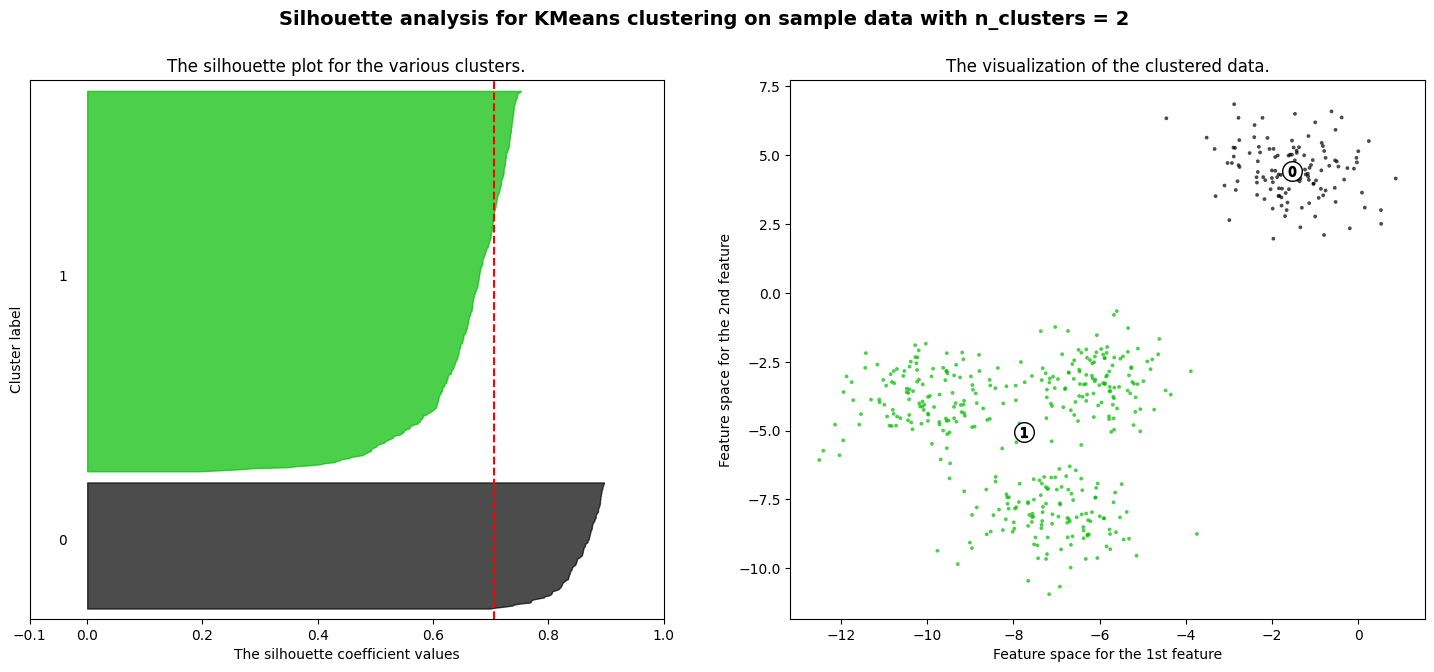

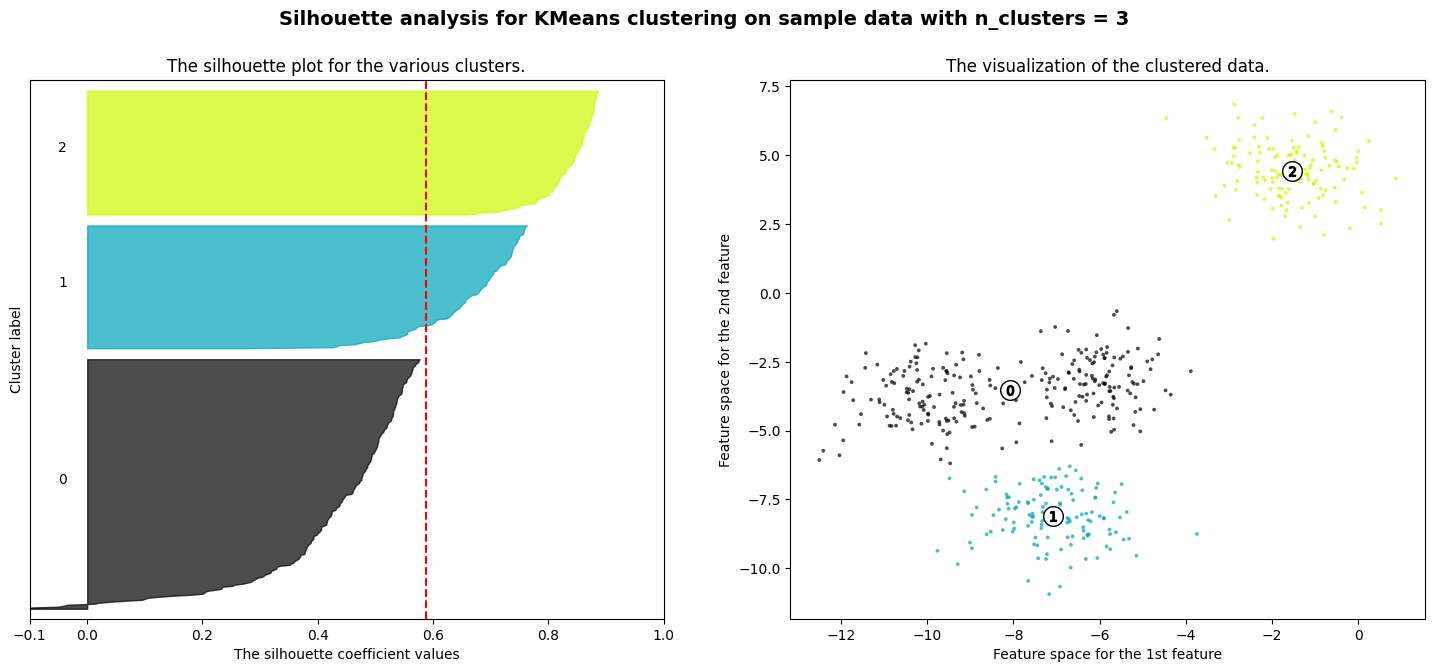

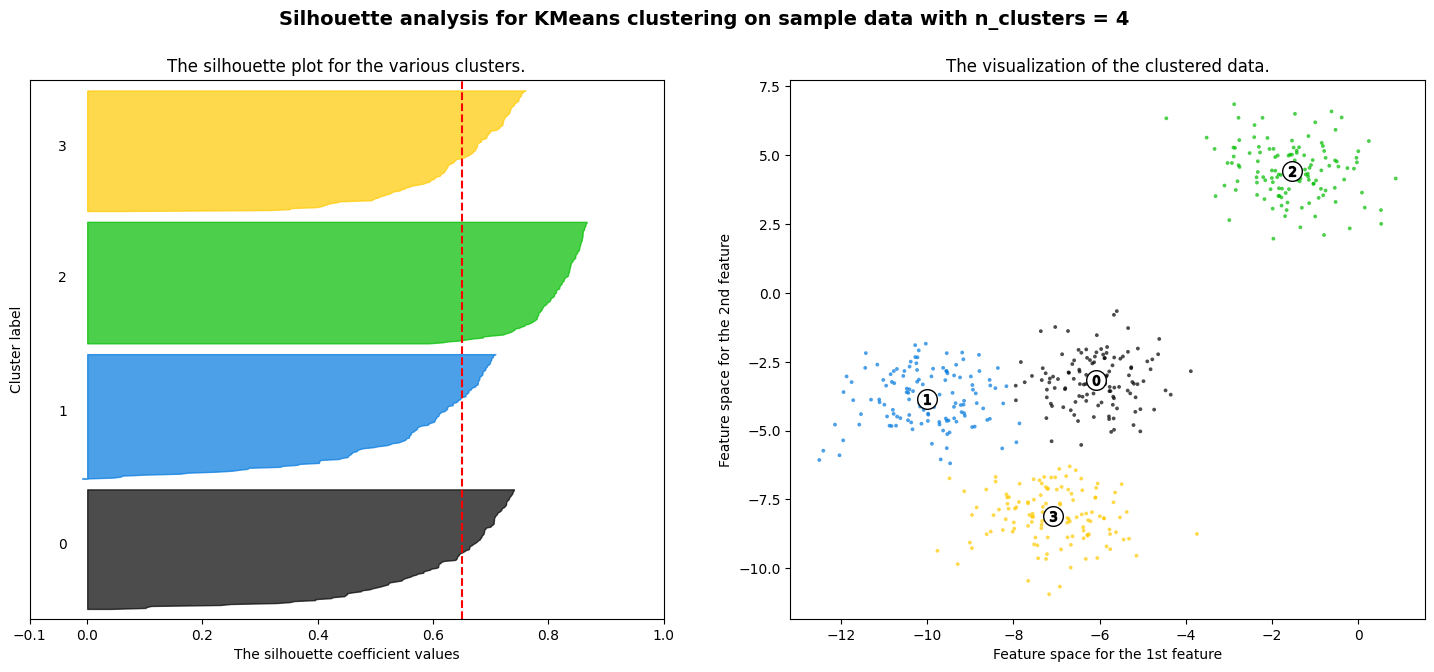

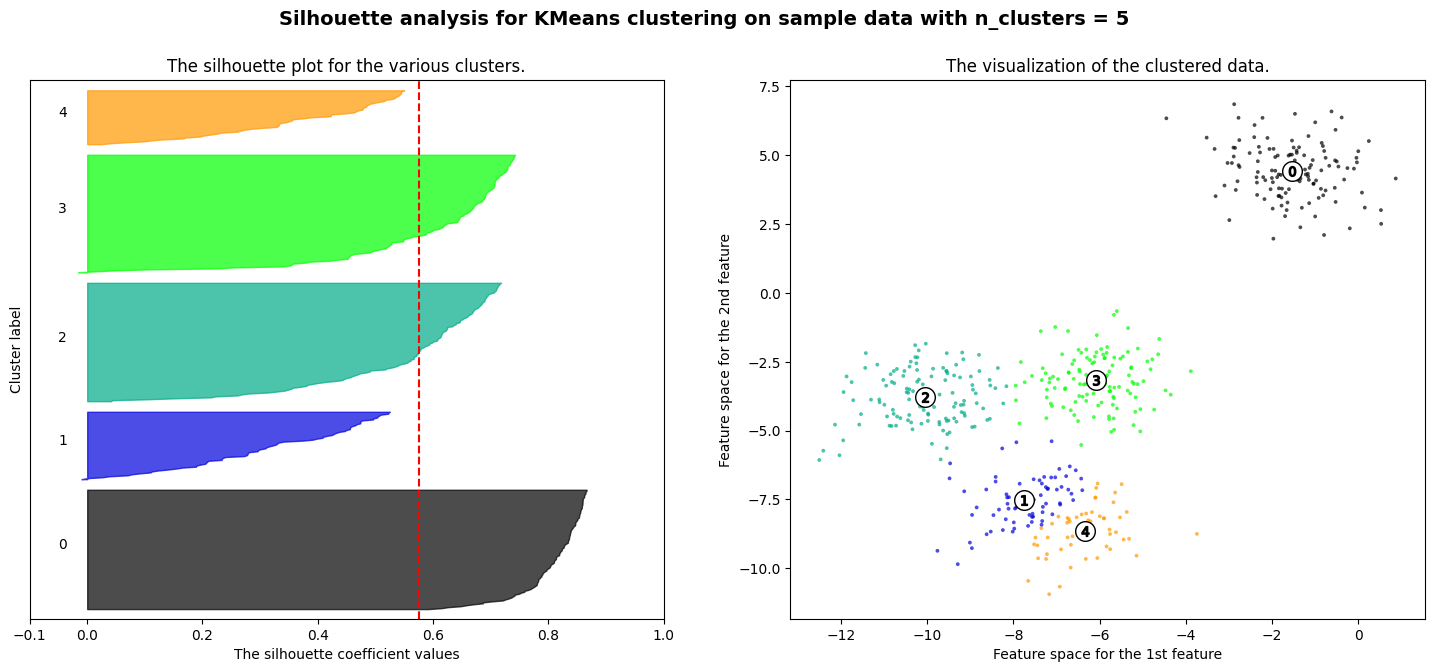

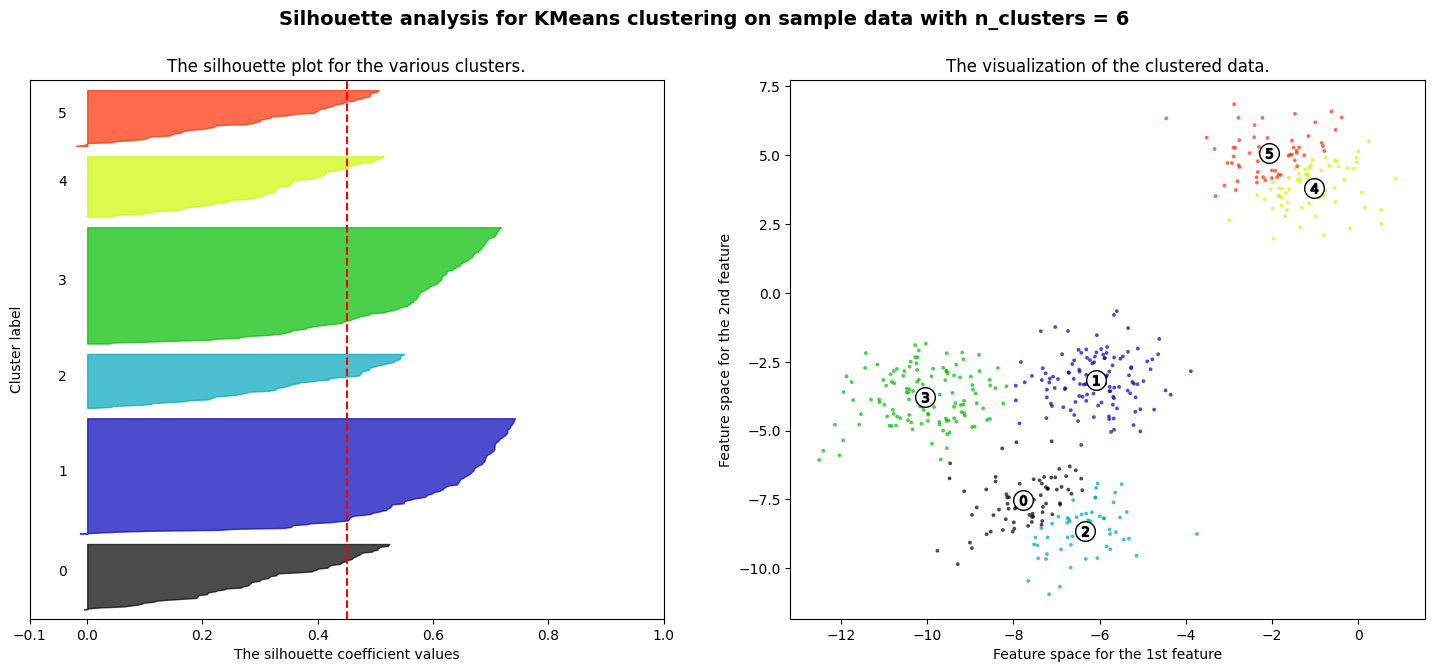

In [123]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd  
import os
 
 
# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
# Wybór liczby skupień celem porównania 
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10
    
    clusterer = KMeans(n_clusters,init='random',random_state=10)
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X,cluster_labels)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

In [124]:
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values

In [125]:
AggClustward = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage="ward")

clustering_ward = AggClustward.fit_predict(data)

In [126]:
AggClustcomplete = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage="complete")

clustering_complete = AggClustcomplete.fit_predict(data)

In [127]:
AggClustaverage = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage="average")

clustering_average = AggClustaverage.fit_predict(data)

In [128]:
AggClustsingle = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage="single")

clustering_single = AggClustsingle.fit_predict(data)

In [129]:
algorithms = ["ward","complete","average","single"]

for algorithm in algorithms:
    clusterer = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage=algorithm)
    # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)


For algorithm = ward The average silhouette_score is : 0.5601927568066969
For algorithm = complete The average silhouette_score is : 0.4756165920236315
For algorithm = average The average silhouette_score is : 0.5560650604055155
For algorithm = single The average silhouette_score is : 0.26155635074640027


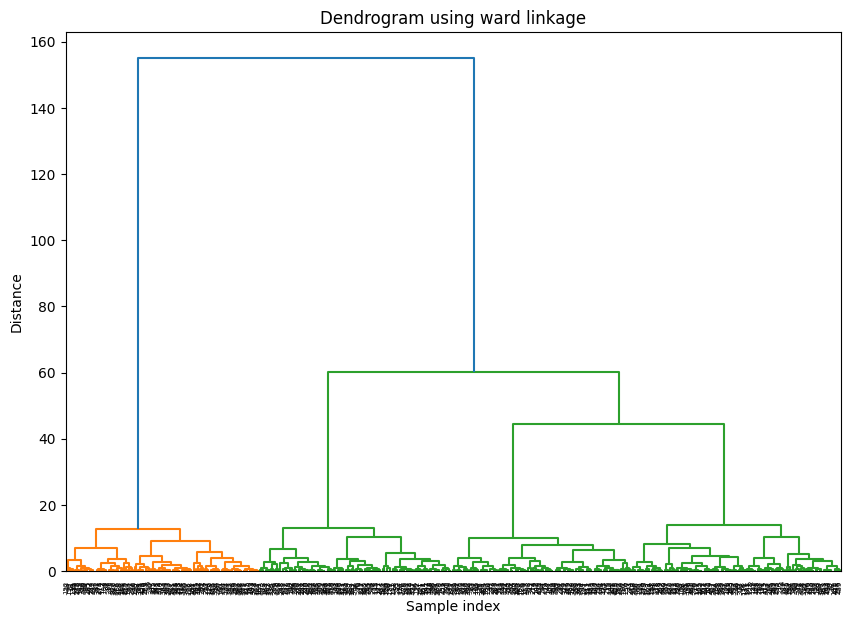

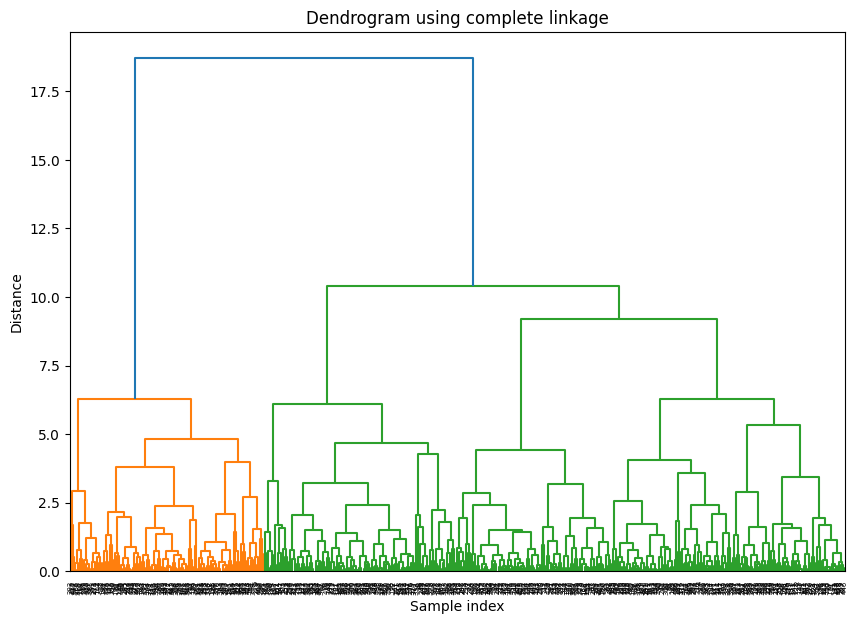

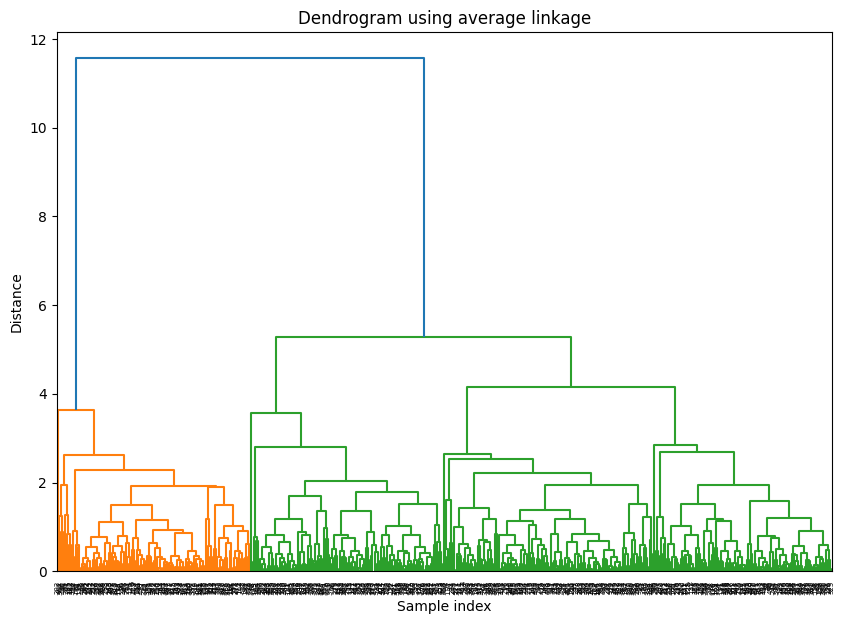

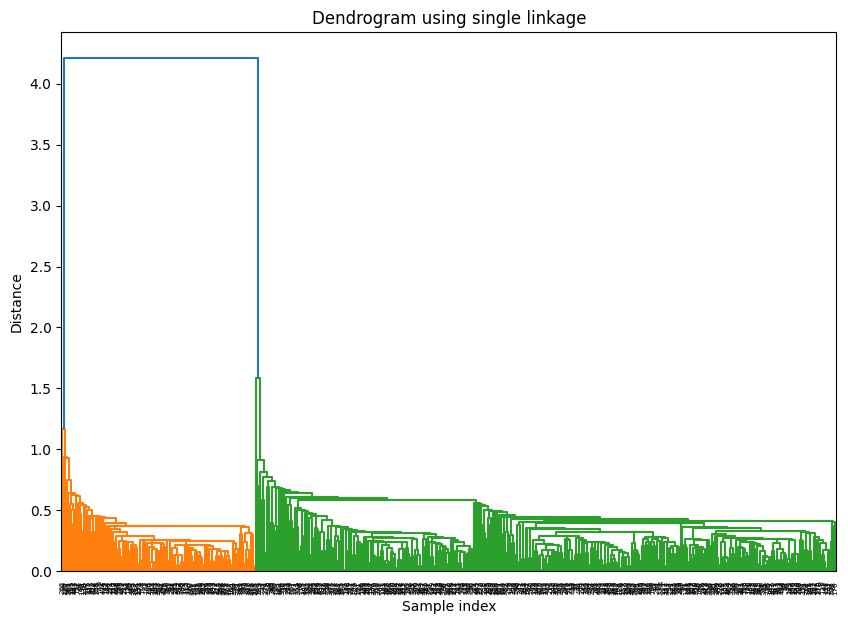

In [130]:
import scipy.cluster.hierarchy as ch

for algorithm in algorithms:
    # Utwórz drzewo hierarchiczne z wykorzystaniem linkage
    Z = ch.linkage(X, method=algorithm)
    
    # Rysuj dendrogram
    plt.figure(figsize=(10, 7)) 
    plt.title(f'Dendrogram using {algorithm} linkage')
    ch.dendrogram(Z)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

 


In [131]:
from sklearn.datasets import make_moons
import seaborn as sns
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

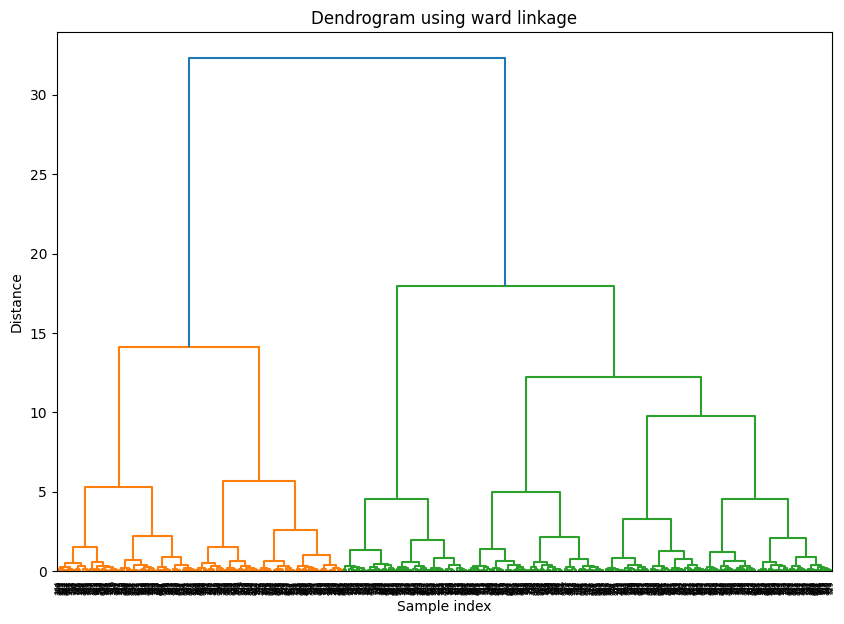

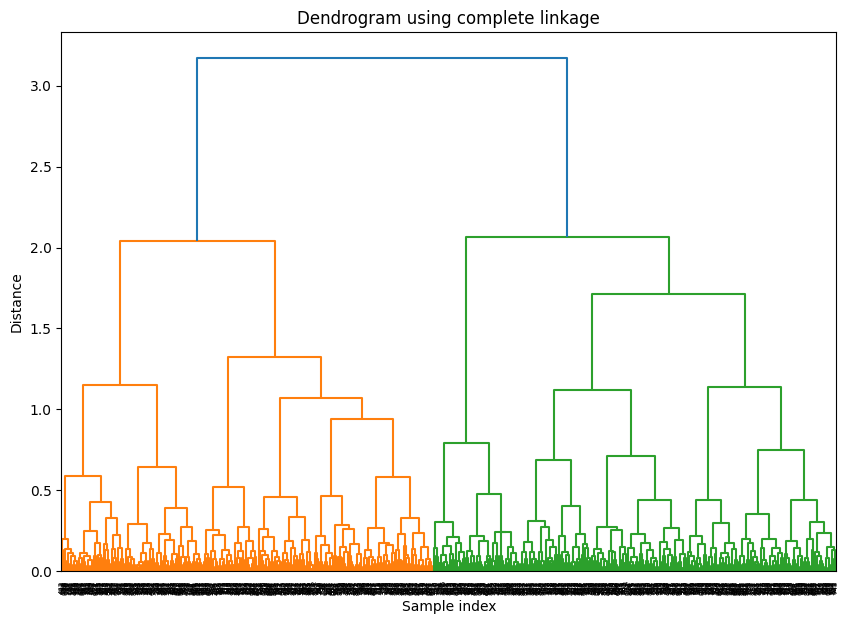

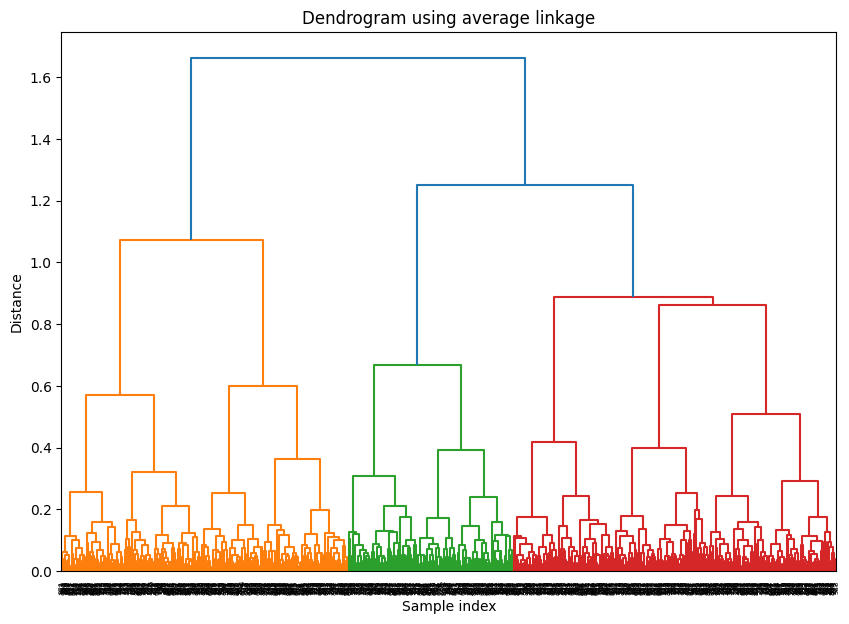

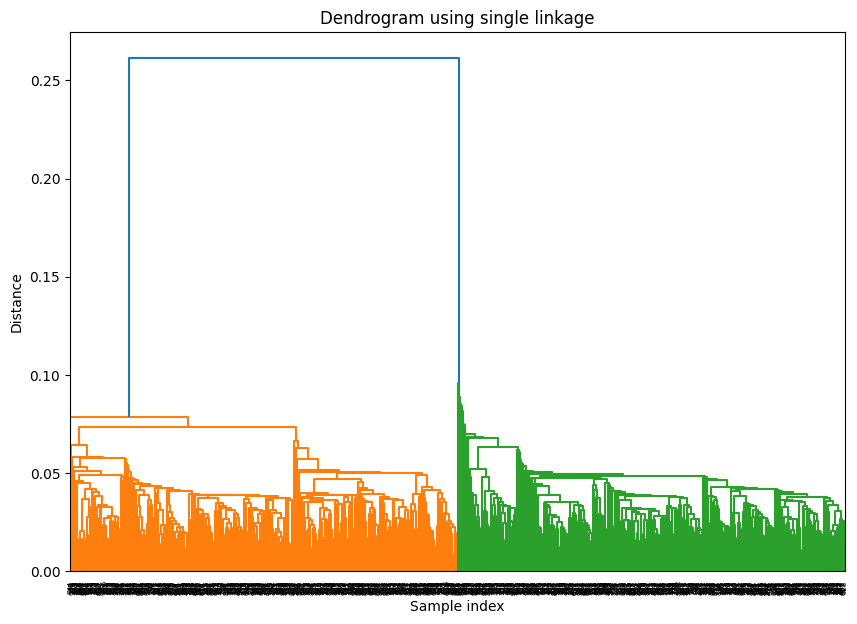

In [132]:
for algorithm in algorithms:
    # Utwórz drzewo hierarchiczne z wykorzystaniem linkage
    Z = ch.linkage(X_moon, method=algorithm)
    
    # Rysuj dendrogram
    plt.figure(figsize=(10, 7)) 
    plt.title(f'Dendrogram using {algorithm} linkage')
    ch.dendrogram(Z)
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()


In [133]:
algorithms = ["ward","complete","average","single"]

for algorithm in algorithms:
    clusterer = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage=algorithm)
    # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X_moon)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_moon, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)

For algorithm = ward The average silhouette_score is : 0.43779962020896995
For algorithm = complete The average silhouette_score is : 0.4192285739294747
For algorithm = average The average silhouette_score is : 0.4640124901550164
For algorithm = single The average silhouette_score is : -0.3443830402837535


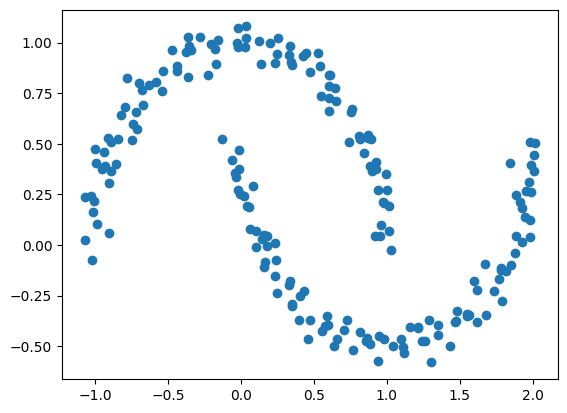

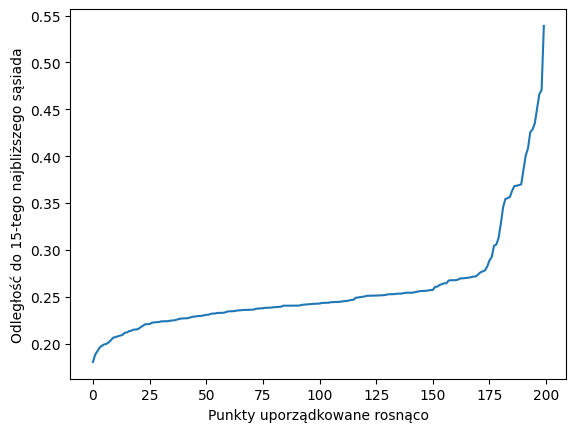

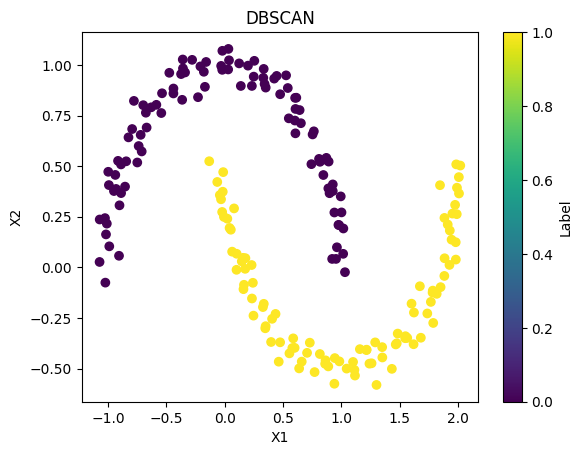

For DBSCAN the average silhouette_score is : 0.32585318950197517
For algorithm = ward The average silhouette_score is : 0.4447831378929408


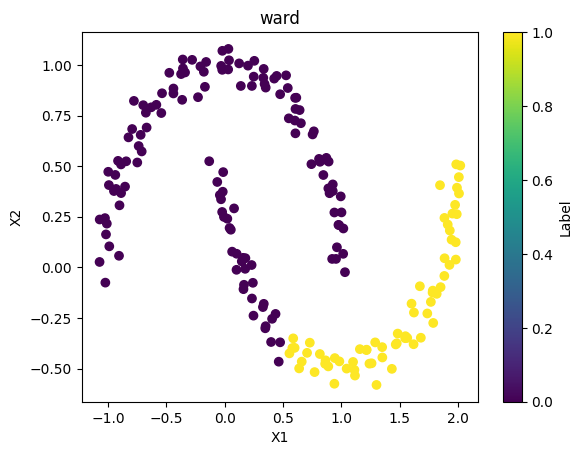

For algorithm = ward The average silhouette_score is : 0.4447831378929408
For algorithm = complete The average silhouette_score is : 0.4759674522921361


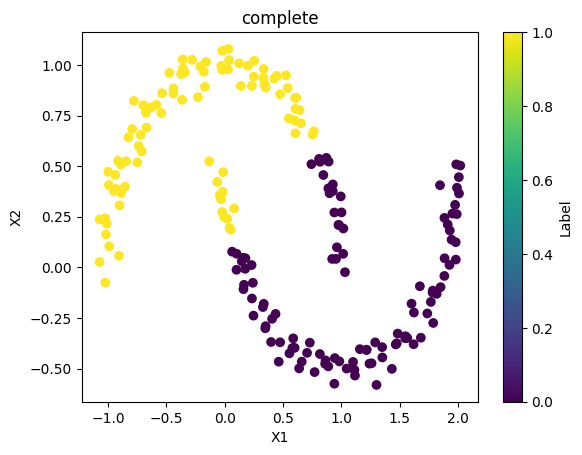

For algorithm = complete The average silhouette_score is : 0.4759674522921361
For algorithm = average The average silhouette_score is : 0.4447831378929408


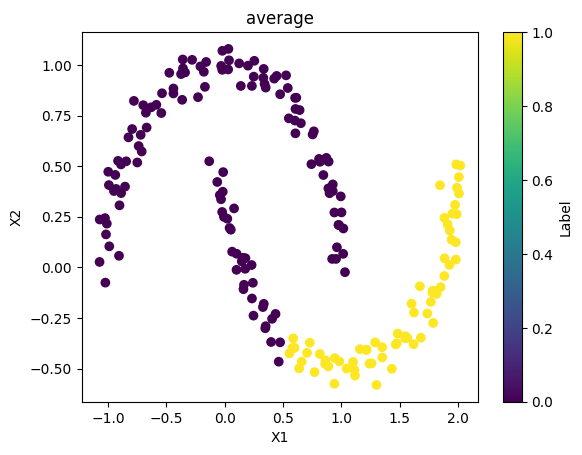

For algorithm = average The average silhouette_score is : 0.4447831378929408
For algorithm = single The average silhouette_score is : 0.32585318950197517


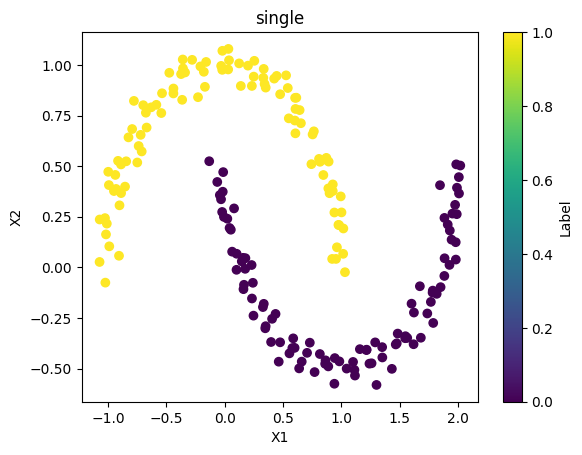

For algorithm = single The average silhouette_score is : 0.32585318950197517


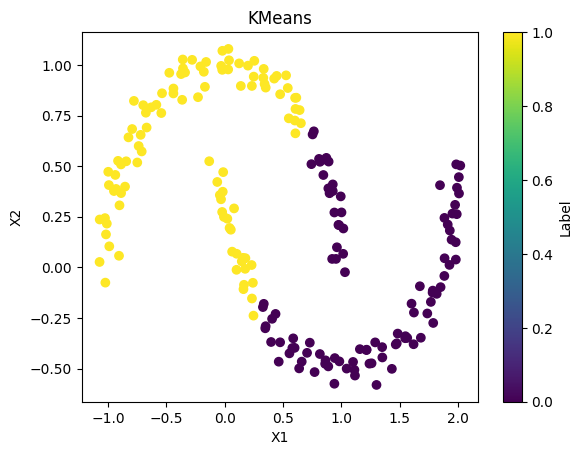

For KMeans the average silhouette_score is : 0.32585318950197517


In [178]:
from sklearn.datasets import make_blobs, make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()
from sklearn.cluster import DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 15  # min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)


distances_k = np.sort(distances[:, k-1])

plt.plot(distances_k)
plt.ylabel(f'Odległość do {k}-tego najbliższego sąsiada')
plt.xlabel('Punkty uporządkowane rosnąco')
plt.show()

dbscan = DBSCAN(eps=0.27,min_samples=2)

clusterer = dbscan.fit(x)
labels = clusterer.labels_
    
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()
silhouette_avg = silhouette_score(x, clusterer.labels_)

print("For DBSCAN the average silhouette_score is :", silhouette_avg)
for algorithm in algorithms:
    clusterer = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage=algorithm)
    # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)
    labels = cluster_labels

    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'{algorithm}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Label')
    plt.show()
    silhouette_avg = silhouette_score(x, cluster_labels)


    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)

km = KMeans(n_clusters = 2,init='k-means++')

y_km = km.fit_predict(x)

labels = y_km

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'KMeans')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()

silhouette_avg = silhouette_score(x, cluster_labels)

print("For KMeans the average silhouette_score is :", silhouette_avg)


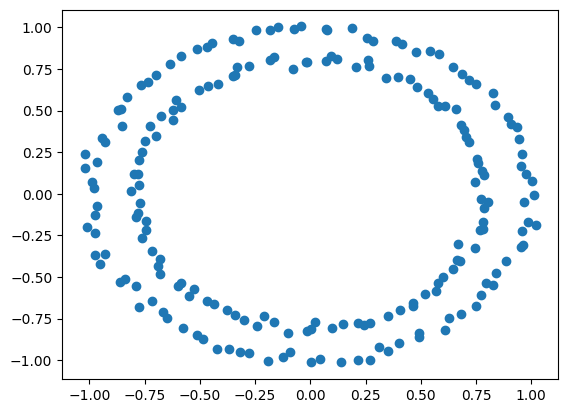

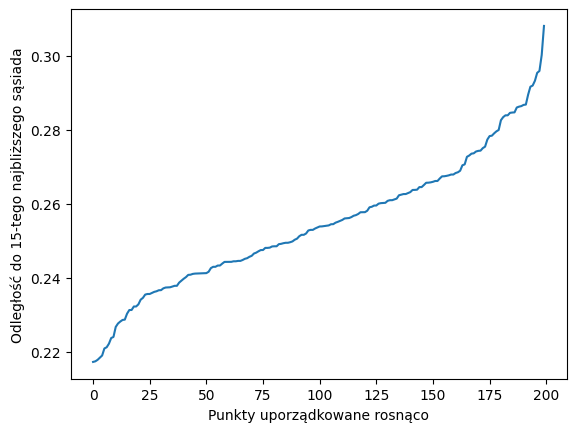

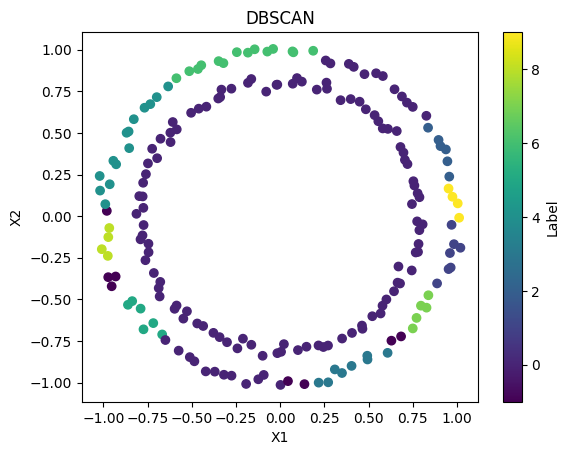

For DBSCAN the average silhouette_score is : -0.26624959819144806


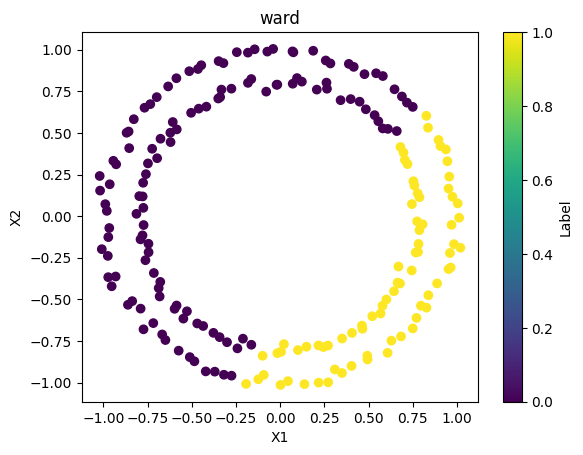

For algorithm = ward The average silhouette_score is : 0.36958108277010704


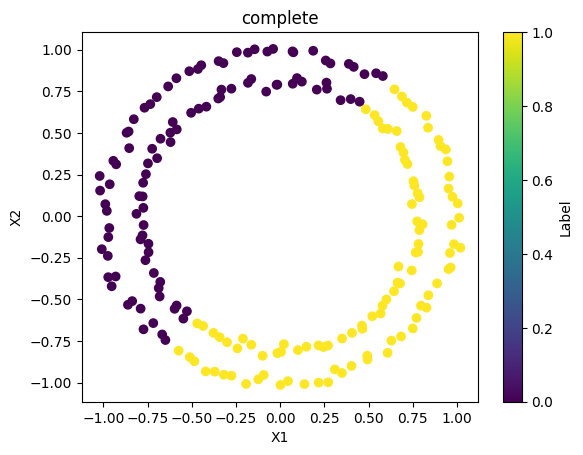

For algorithm = complete The average silhouette_score is : 0.39675084663894966


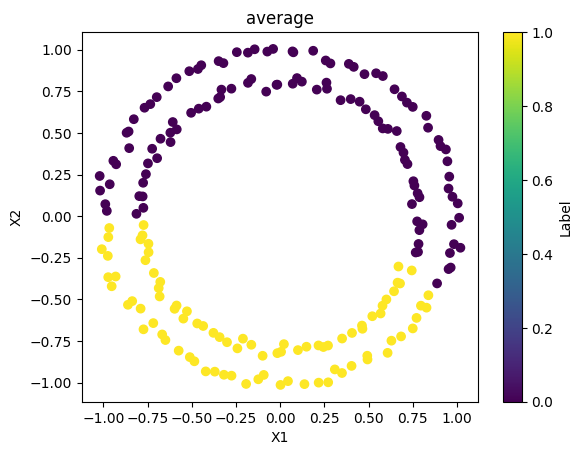

For algorithm = average The average silhouette_score is : 0.3864931712122375


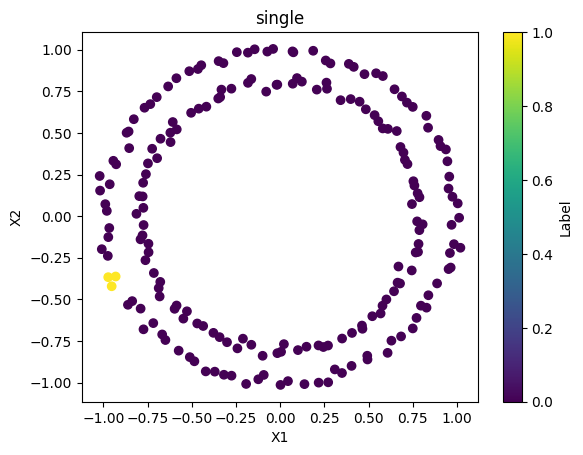

For algorithm = single The average silhouette_score is : 0.013192427407593552


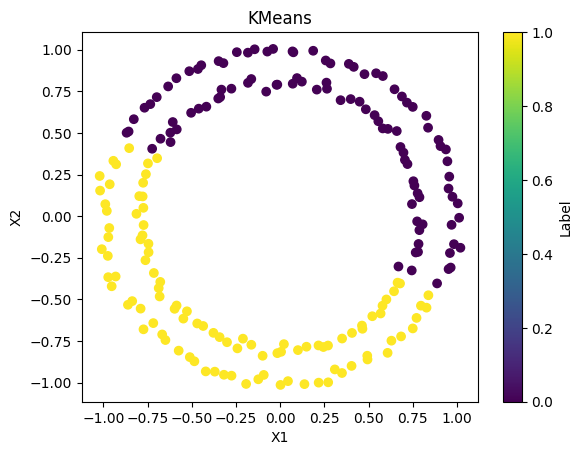

For KMeans the average silhouette_score is : 0.013192427407593552


In [179]:

x, y = make_circles(n_samples=200,noise=.02, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()
from sklearn.cluster import DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 15 # min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)

# sortujemy odległości do k-tego najbliższego sąsiada
distances_k = np.sort(distances[:, k-1])

plt.plot(distances_k)
plt.ylabel(f'Odległość do {k}-tego najbliższego sąsiada')
plt.xlabel('Punkty uporządkowane rosnąco')
plt.show()

dbscan = DBSCAN(eps=0.12,min_samples=4)

clusterer = dbscan.fit(x)
labels = clusterer.labels_
    
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()
silhouette_avg = silhouette_score(x, clusterer.labels_)

print("For DBSCAN the average silhouette_score is :", silhouette_avg)


for algorithm in algorithms:
    clusterer = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage=algorithm)
    # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # clusterer = dbscan.fit(x)
    labels = cluster_labels

    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'{algorithm}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Label')
    plt.show()
    silhouette_avg = silhouette_score(x, cluster_labels)


    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)

km = KMeans(n_clusters = 2,init='k-means++')

y_km = km.fit_predict(x)

labels = y_km

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'KMeans')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()

silhouette_avg = silhouette_score(x, cluster_labels)

print("For KMeans the average silhouette_score is :", silhouette_avg)


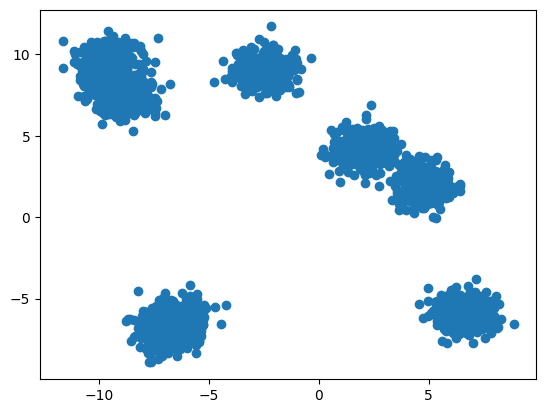

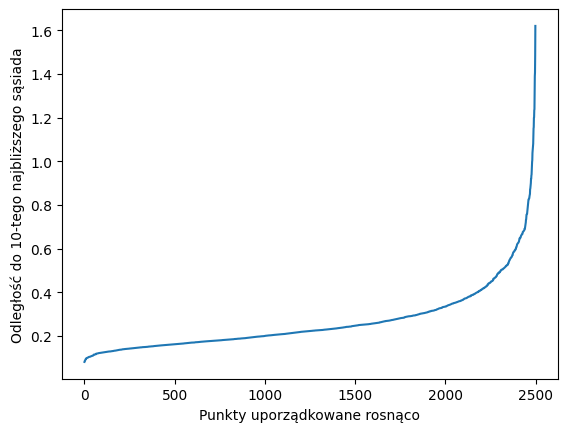

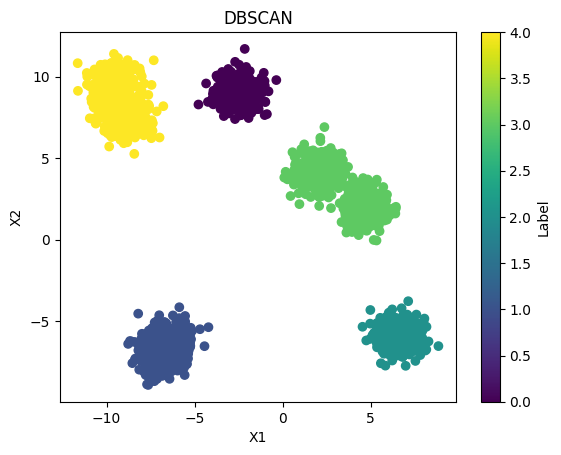

For DBSCAN the average silhouette_score is : 0.7858222938424863


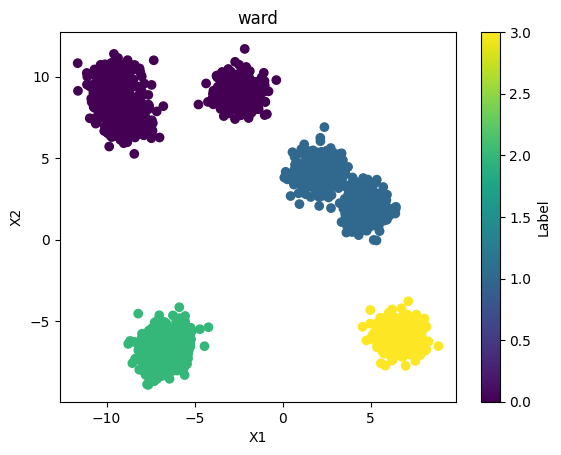

For algorithm = ward The average silhouette_score is : 0.7520287702256367


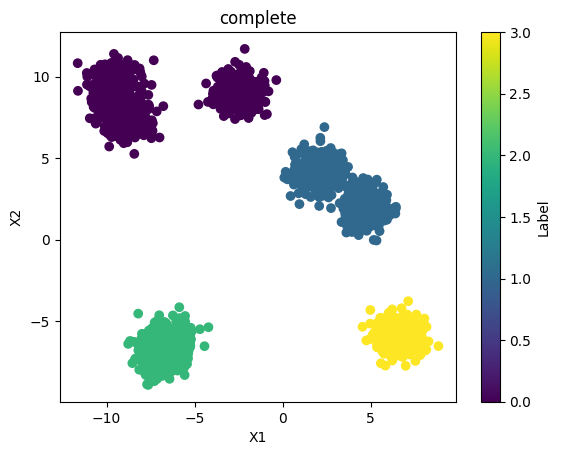

For algorithm = complete The average silhouette_score is : 0.7520287702256367


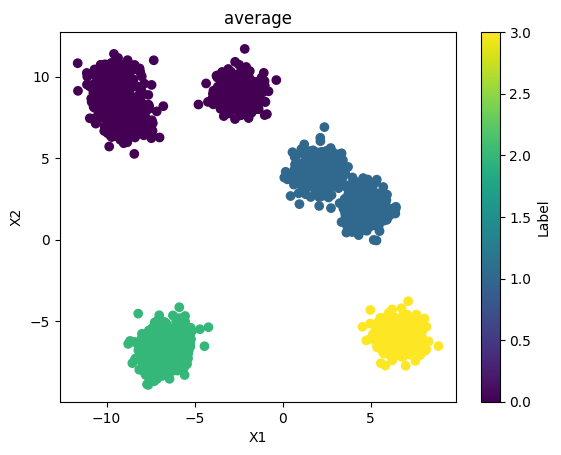

For algorithm = average The average silhouette_score is : 0.7520287702256367


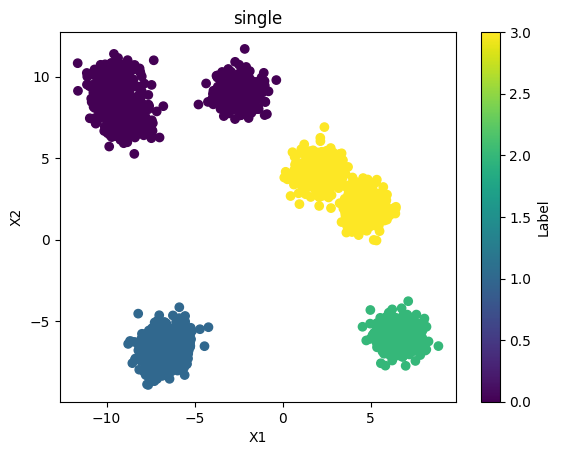

For algorithm = single The average silhouette_score is : 0.7520287702256367


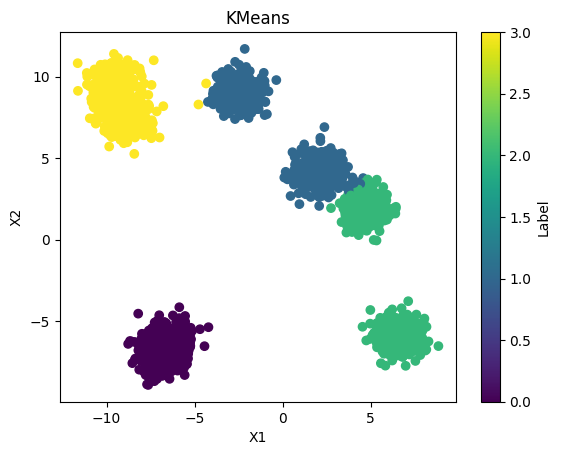

For KMeans the average silhouette_score is : 0.7520287702256367


In [ ]:
x, y = make_blobs(n_samples=2500, centers=4, n_features=2, cluster_std=0.7, shuffle=True,random_state=42)
plt.scatter(x[:,0],x[:,1])
plt.show()
from sklearn.cluster import DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 10  # min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)

# sortujemy odległości do k-tego najbliższego sąsiada
distances_k = np.sort(distances[:, k-1])

plt.plot(distances_k)
plt.ylabel(f'Odległość do {k}-tego najbliższego sąsiada')
plt.xlabel('Punkty uporządkowane rosnąco')
plt.show()

dbscan = DBSCAN(eps=1.2,min_samples=4)

clusterer = dbscan.fit(x)
labels = clusterer.labels_
    
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()
silhouette_avg = silhouette_score(x, clusterer.labels_)

print("For DBSCAN the average silhouette_score is :", silhouette_avg)


for algorithm in algorithms:
    clusterer = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage=algorithm)
    # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # clusterer = dbscan.fit(x)
    labels = cluster_labels

    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'{algorithm}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Label')
    plt.show()
    silhouette_avg = silhouette_score(x, cluster_labels)


    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For algorithm =", algorithm,
            "The average silhouette_score is :", silhouette_avg)
    

km = KMeans(n_clusters = 4,init='k-means++')

y_km = km.fit_predict(x)

labels = y_km

plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'KMeans')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()

silhouette_avg = silhouette_score(x, cluster_labels)

print("For KMeans the average silhouette_score is :", silhouette_avg)
